In [1]:
import pandas as pd
import geopandas as gpd
import contextily as cx
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from shapely.geometry import Point
import numpy as np
import osmnx as ox
import seaborn as sns
import urllib.request
from PIL import Image
import io  # Import the io module

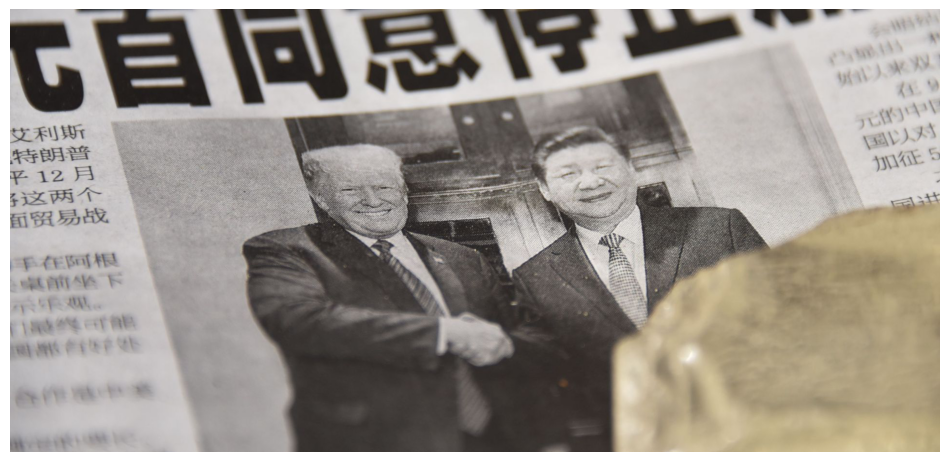

In [2]:
# BULLETIN HEADER
# URL of the image you want to display
url = "https://worldview.stratfor.com/sites/default/files/styles/2x1_full/public/displau-tariffs-truce-gettyimages-1067885236.jpg?itok=fI-PycKg"

# Download the image from the URL
img_data = urllib.request.urlopen(url).read()

# Convert the image data into a numpy array using PIL
img = Image.open(io.BytesIO(img_data))
img_array = np.array(img)

# Create a larger figure
plt.figure(figsize=(12, 6))

# Display the image
plt.imshow(img_array)
plt.axis('off')  # Turn off axis labels
plt.show()

## Trying an Animation in the cell below

NameError: name 'FuncAnimation' is not defined

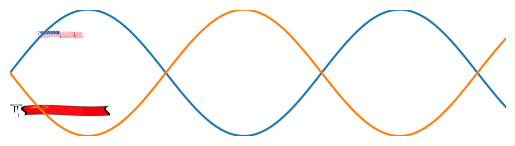

In [3]:
# Create a figure and axis
fig, ax = plt.subplots()
ax.set_xlim(0, 10)
ax.set_ylim(-1, 1)
ax.axis('off')  # Turn off axis labels

# Create two sets of x values
x1 = np.linspace(0, 10, 100)
x2 = np.linspace(0, 10, 100)

# Create two sine curves
y1 = np.sin(x1)
y2 = -(np.sin(x2))  # Invert the second curve

# Plot the sine curves
ax.plot(x1, y1)
ax.plot(x2, y2)

# Load the flag images
img_usa = plt.imread('E:/IAAC - Work/X_Semester2_X/Digital Tools Python/Final Presentation/usa flag.png')
img_china = plt.imread('E:/IAAC - Work/X_Semester2_X/Digital Tools Python/Final Presentation/china.png')

# Calculate the aspect ratios of the images
aspect_ratio_usa = img_usa.shape[1] / img_usa.shape[0]
aspect_ratio_china = img_china.shape[1] / img_china.shape[0]

# Plot the flag images with adjusted extent values
flag_usa = ax.imshow(img_usa, extent=[0, 2, 0.5, 0.7], aspect=aspect_ratio_usa)
flag_china = ax.imshow(img_china, extent=[0, 2, -0.7, -0.5], aspect=aspect_ratio_china)

# Define the number of frames
num_frames = 100

# Function to update the animation
def update(frame):
    # Calculate the index for each frame
    index = frame % len(x1)
    
    # Get the x and y points for the current frame
    x_point1 = x1[index]
    y_point1 = y1[index]
    x_point2 = x2[index]
    y_point2 = y2[index]
    
    # Update the positions of the flag images
    flag_usa.set_extent([x_point1, x_point1 + 2, y_point1 - 0.1, y_point1 + 0.1])
    flag_china.set_extent([x_point2, x_point2 + 2, y_point2 - 0.1, y_point2 + 0.1])
    
    return flag_usa, flag_china

# Create the animation with 100 frames
ani = FuncAnimation(fig, update, frames=num_frames, interval=50, blit=True)

# Display the animation
plt.show()

In [7]:
df_chinaports = pd.read_csv('C:/Users/Siddharth/JupyterFiles_Python/2nd Term/Data/Data for US_China/China Overseas Ports Final_VictorCLEANED.csv')
df_chinaports.dropna(subset='CONST. START', inplace=True)
df_chinaports.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 0 to 71
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PORT                    72 non-null     object 
 1   Country                 72 non-null     object 
 2   AGENDA FOR NAVAL USE    72 non-null     object 
 3   SHARE OWNERSHIP         72 non-null     object 
 4   INV (in M$)             72 non-null     object 
 5   INV. TYPE               72 non-null     object 
 6   CONST. START            72 non-null     float64
 7   CONST. END              43 non-null     float64
 8   Cooperative enterprise  72 non-null     object 
 9   Latitude                72 non-null     float64
 10  Longitude               72 non-null     float64
dtypes: float64(4), object(7)
memory usage: 6.8+ KB


In [8]:
print(df_chinaports.iloc[38:50])  # Display rows 40 to 49

                                                 PORT       Country  \
38             Ashdod South Port Construction Project        Israel   
39                     Saudi Ras az Zawr Port Project  Saudi Arabia   
40  Dammam Port 2nd Container Terminal Phase 1 Pro...  Saudi Arabia   
41                Hamad Port Phase 1 Terminal Project         Qatar   
42        Phase 1 of the Khalifa Port Station Project           UAE   
43             Gwadar Deepwater Port Phase 1 Pakistan      Pakistan   
44  Qasim Port QICT No.2 Container Terminal Constr...      Pakistan   
45  Vizhinjam Port Automation Terminal General Con...         India   
46     Sri Lanka Colombo Port South Terminal Project      Sri Lanka   
47                            Hambantota Port Project     Sri Lanka   
48                             Kyauk Pyu Port Project       Myanmar   
49                  Phnom Penh New Container Terminal      Cambodia   

   AGENDA FOR NAVAL USE SHARE OWNERSHIP INV (in M$)      INV. TYPE  \
38    

In [9]:
df_chinaports.head()

,PORT,Country,AGENDA FOR NAVAL USE,SHARE OWNERSHIP,INV (in M$),INV. TYPE,CONST. START,CONST. END,Cooperative enterprise,Latitude,Longitude
0,Riga Port Coal Terminal Project,Latvia,Yes,"0,00%",110.00,Joint Venture,2016.0,2018.0,China Harbour,56.946285,24.105078
1,Hamburg Port Container Terminal Tollerot Aquis...,Germany,No,"24,99%",76.00,Acquisition,2022.0,NaN,COSCO Shipping,53.548800,9.987200
2,Rotterdam EUROMAX Container Acquisition,The Netherlands,Yes,"35,00%",140.00,Acquisition,2016.0,NaN,COSCO Shipping,51.924400,4.477700
3,Zeenbrugge Container Terminal Acquisition,Belgium,No,"100,00%",39.00,Acquisition,2017.0,NaN,COSCO Shipping,51.209200,3.224800
4,Marseille Port of Fos Eurofos Terminal Link Ac...,France,Unclear,"49,00%",450.00,Joint Venture,2013.0,NaN,China Merchants International,43.296500,5.369800


In [10]:
print(df_chinaports.dtypes)

PORT                       object
Country                    object
AGENDA FOR NAVAL USE       object
SHARE OWNERSHIP            object
INV (in M$)                object
INV. TYPE                  object
CONST. START              float64
CONST. END                float64
Cooperative enterprise     object
Latitude                  float64
Longitude                 float64
dtype: object


In [11]:
# Convert 'CONST. START' and 'CONST. END' columns from float to int64
df_chinaports['CONST. START'] = df_chinaports['CONST. START'].astype('Int64')
df_chinaports['CONST. END'] = df_chinaports['CONST. END'].astype('Int64')

In [12]:
print(df_chinaports.dtypes)

PORT                       object
Country                    object
AGENDA FOR NAVAL USE       object
SHARE OWNERSHIP            object
INV (in M$)                object
INV. TYPE                  object
CONST. START                Int64
CONST. END                  Int64
Cooperative enterprise     object
Latitude                  float64
Longitude                 float64
dtype: object


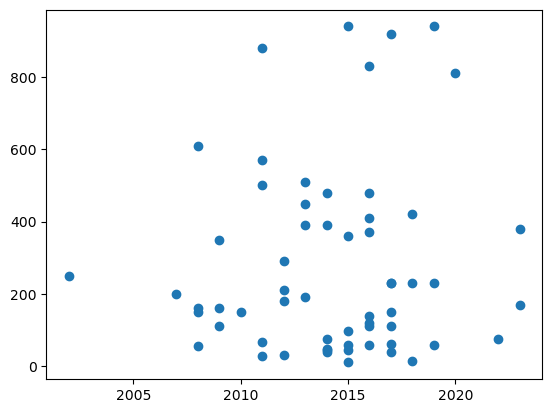

In [49]:
# Convert "INV (in M$)" column to numeric
df_chinaports["INV (in M$)"] = pd.to_numeric(df_chinaports["INV (in M$)"], errors='coerce')
df_chinaports["CONST. START"] = pd.to_numeric(df_chinaports["CONST. START"], errors='coerce')

plt.scatter(df_chinaports["CONST. START"], df_chinaports["INV (in M$)"])
plt.show()


In [50]:
print(df_chinaports["CONST. START"].unique())

<IntegerArray>
[2016, 2022, 2017, 2013, 2015, 2014, 2018, 2020, 2012, 2010, 2011, 2009, 2008,
 2023, 2007, 2019, 2002]
Length: 17, dtype: Int64


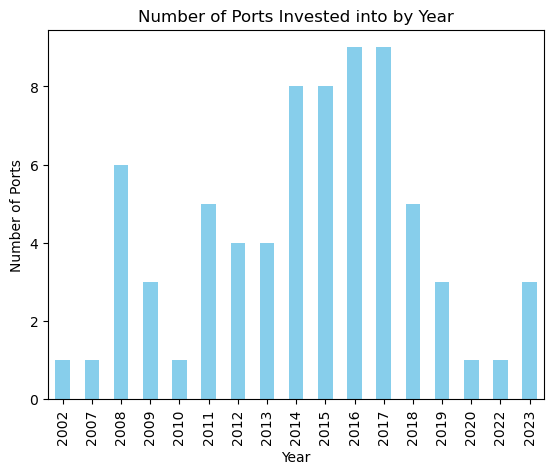

In [85]:
# Group by year and count the number of ports
ports_by_year = df_chinaports.groupby("CONST. START").size()

# Plot a bar chart
ports_by_year.plot(kind='bar', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Ports')
plt.title('Number of Ports Invested into by Year')
# Save the chart as a PNG image
plt.savefig('ports_by_year.png')

plt.show()

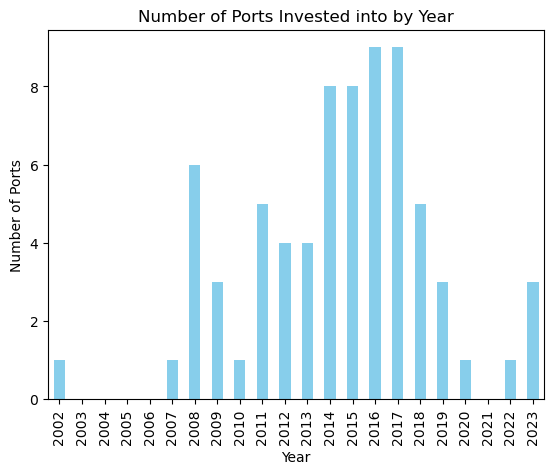

In [52]:
# Define the desired year range
year_range = range(2002, 2024)

# Reindex the ports_by_year Series with the desired year range and fill missing values with zeros
ports_by_year = ports_by_year.reindex(year_range, fill_value=0)

# Plot a bar chart
ports_by_year.plot(kind='bar', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Ports')
plt.title('Number of Ports Invested into by Year')
plt.show()

In [16]:
# To see where the downloaded png file was saved
import os
os.getcwd()

'C:\\Users\\Siddharth\\JupyterFiles_Python\\2nd Term\\Untitled Folder'

In [13]:
df_UsFDI= pd.read_csv("C:/Users/Siddharth/JupyterFiles_Python/2nd Term/Data/Data for US_China/Can you give me US FDI inflows in China from the year 2000 till date and cite me the source from where you get these numbers.csv")
df_UsFDI.head()

,Year,US FDI Inflow (USD Billion)
0,2000,3.9
1,2001,4.5
2,2002,5.7
3,2003,12.5
4,2004,24.4


In [54]:
df_UsFDI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         23 non-null     int64  
 1   US FDI Inflow (USD Billion)  23 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 500.0 bytes


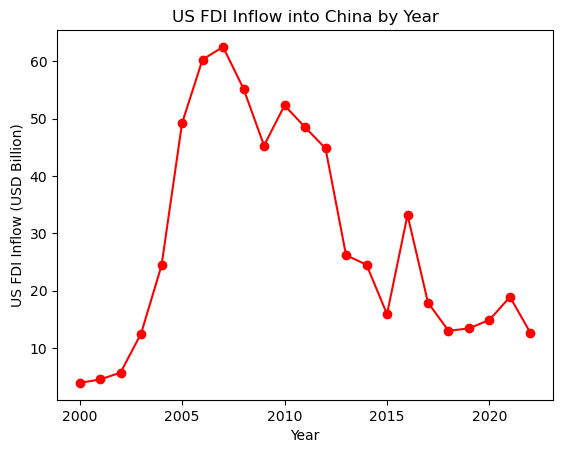

In [19]:
# Plot the US FDI Inflow against time
plt.plot(df_UsFDI['Year'], df_UsFDI['US FDI Inflow (USD Billion)'], marker='o', color='red', linestyle='-')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('US FDI Inflow (USD Billion)')
plt.title('US FDI Inflow into China by Year')

# Save the chart as a PNG image
plt.savefig('US FDI Inflow into China by Year.png')

# Show the plot
plt.show()

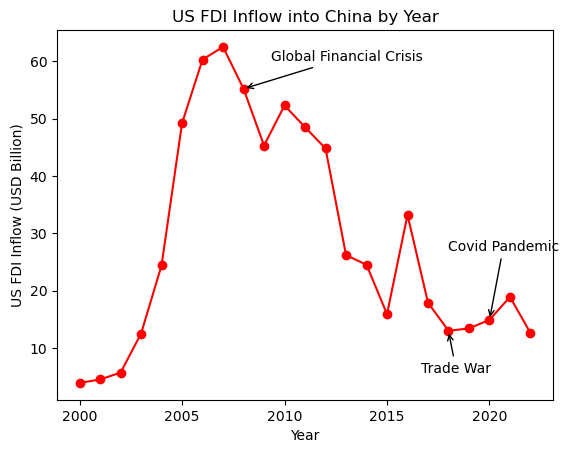

In [14]:
# Plot the US FDI Inflow against time
plt.plot(df_UsFDI['Year'], df_UsFDI['US FDI Inflow (USD Billion)'], marker='o', color='red', linestyle='-')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('US FDI Inflow (USD Billion)')
plt.title('US FDI Inflow into China by Year')

# Show the plot

# Add annotations for specific years
plt.annotate('Global Financial Crisis', xy=(2008, df_UsFDI.loc[df_UsFDI['Year'] == 2008, 'US FDI Inflow (USD Billion)'].values[0]),
             xytext=(20, 20), textcoords='offset points', arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate('Trade War', xy=(2018, df_UsFDI.loc[df_UsFDI['Year'] == 2018, 'US FDI Inflow (USD Billion)'].values[0]),
             xytext=(-20, -30), textcoords='offset points', arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate('Covid Pandemic', xy=(2020, df_UsFDI.loc[df_UsFDI['Year'] == 2020, 'US FDI Inflow (USD Billion)'].values[0]),
             xytext=(-30, 50), textcoords='offset points', arrowprops=dict(facecolor='black', arrowstyle='->'))

# Save the chart as a PNG image
plt.savefig('US FDI Inflow into China by Year.png')

plt.show()

In [21]:
# To see where the downloaded png file was saved
import os
os.getcwd()

'C:\\Users\\Siddharth\\JupyterFiles_Python\\2nd Term\\Untitled Folder'

In [55]:
# Convert 'CONST. START' column to Int64 data type
df_chinaports['CONST. START'] = df_chinaports['CONST. START'].astype('Int64')

# Merge the two DataFrames on the year column
merged_df = pd.merge(df_chinaports, df_UsFDI, left_on='CONST. START', right_on='Year', how='inner')


In [56]:
# Filter data from df_chinaports for years 2007 and beyond
df_chinaports_filtered = df_chinaports[df_chinaports["CONST. START"] >= 2007]

# Print out the filtered DataFrame
print(df_chinaports_filtered)

                                                 PORT          Country  \
0                     Riga Port Coal Terminal Project           Latvia   
1   Hamburg Port Container Terminal Tollerot Aquis...          Germany   
2             Rotterdam EUROMAX Container Acquisition  The Netherlands   
3           Zeenbrugge Container Terminal Acquisition          Belgium   
4   Marseille Port of Fos Eurofos Terminal Link Ac...           France   
..                                                ...              ...   
67  Port of Balboa Container Phase 3 - Terminal Pa...           Panama   
68                     Posorha Deepwater Port Project          Ecuador   
69                       Chancay Terminal Acquisition             Peru   
70                 San Antonio Pier Expansion Project            Chile   
71          Paranagua Port Terminal (TCP) Acquisition           Brazil   

   AGENDA FOR NAVAL USE SHARE OWNERSHIP  INV (in M$)      INV. TYPE  \
0                   Yes           0,00% 

In [57]:
# Filter the df_UsFDI DataFrame to include only the years 2007 and above
df_UsFDI_filtered = df_UsFDI[df_UsFDI['Year'] >= 2007]

# Print out the filtered DataFrame
print(df_UsFDI_filtered)

    Year  US FDI Inflow (USD Billion)
7   2007                         62.5
8   2008                         55.2
9   2009                         45.3
10  2010                         52.3
11  2011                         48.5
12  2012                         44.8
13  2013                         26.2
14  2014                         24.5
15  2015                         15.9
16  2016                         33.2
17  2017                         17.9
18  2018                         13.0
19  2019                         13.4
20  2020                         14.9
21  2021                         18.9
22  2022                         12.6


In [58]:
df_chinaports_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71 entries, 0 to 71
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PORT                    71 non-null     object 
 1   Country                 71 non-null     object 
 2   AGENDA FOR NAVAL USE    71 non-null     object 
 3   SHARE OWNERSHIP         71 non-null     object 
 4   INV (in M$)             59 non-null     float64
 5   INV. TYPE               71 non-null     object 
 6   CONST. START            71 non-null     Int64  
 7   CONST. END              42 non-null     Int64  
 8   Cooperative enterprise  71 non-null     object 
 9   Latitude                71 non-null     float64
 10  Longitude               71 non-null     float64
dtypes: Int64(2), float64(3), object(6)
memory usage: 6.8+ KB


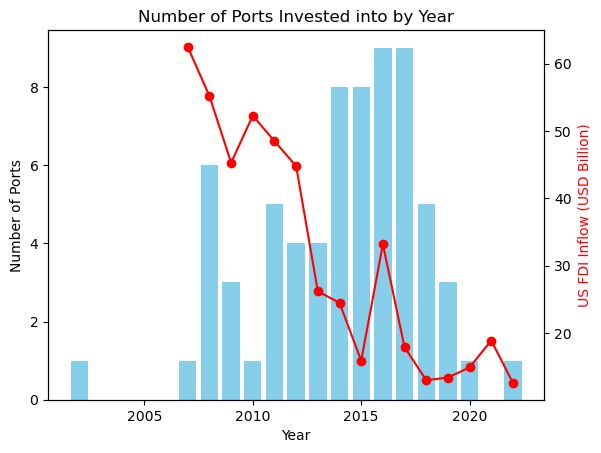

In [28]:
df_chinaports_filtered = df_chinaports[df_chinaports["CONST. START"].isin(df_UsFDI["Year"])].copy()
df_chinaports_filtered.rename(columns={'CONST. START': 'Year'}, inplace=True)

ports_by_year = df_chinaports_filtered.groupby("Year", as_index = False).size()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(ports_by_year["Year"], ports_by_year["size"], color="skyblue")
ax2.plot(df_UsFDI_filtered['Year'], df_UsFDI_filtered['US FDI Inflow (USD Billion)'], marker='o', color='red', linestyle='-')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Ports')
ax1.set_title('Number of Ports Invested into by Year')
ax2.set_ylabel('US FDI Inflow (USD Billion)', color='red')

#Save the plot as a PNG file
plt.savefig('ports_fdi_chart.png', bbox_inches='tight')  # Adjust the filename as needed

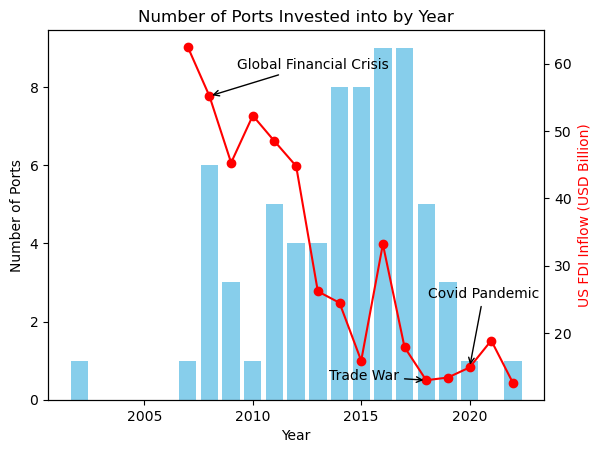

In [59]:
df_chinaports_filtered = df_chinaports[df_chinaports["CONST. START"].isin(df_UsFDI["Year"])].copy()
df_chinaports_filtered.rename(columns={'CONST. START': 'Year'}, inplace=True)

ports_by_year = df_chinaports_filtered.groupby("Year", as_index = False).size()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(ports_by_year["Year"], ports_by_year["size"], color="skyblue")
ax2.plot(df_UsFDI_filtered['Year'], df_UsFDI_filtered['US FDI Inflow (USD Billion)'], marker='o', color='red', linestyle='-')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Ports')
ax1.set_title('Number of Ports Invested into by Year')
ax2.set_ylabel('US FDI Inflow (USD Billion)', color='red')

# Add annotations for specific years
plt.annotate('Global Financial Crisis', xy=(2008, df_UsFDI.loc[df_UsFDI['Year'] == 2008, 'US FDI Inflow (USD Billion)'].values[0]),
             xytext=(20, 20), textcoords='offset points', arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate('Trade War', xy=(2018, df_UsFDI.loc[df_UsFDI['Year'] == 2018, 'US FDI Inflow (USD Billion)'].values[0]),
             xytext=(-70, 0), textcoords='offset points', arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate('Covid Pandemic', xy=(2020, df_UsFDI.loc[df_UsFDI['Year'] == 2020, 'US FDI Inflow (USD Billion)'].values[0]),
             xytext=(-30, 50), textcoords='offset points', arrowprops=dict(facecolor='black', arrowstyle='->'))

#Save the plot as a PNG file
plt.savefig('ports_fdi_chart.png', bbox_inches='tight')  # Adjust the filename as needed

In [60]:
df_chinaports_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 0 to 71
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PORT                    69 non-null     object 
 1   Country                 69 non-null     object 
 2   AGENDA FOR NAVAL USE    69 non-null     object 
 3   SHARE OWNERSHIP         69 non-null     object 
 4   INV (in M$)             58 non-null     float64
 5   INV. TYPE               69 non-null     object 
 6   Year                    69 non-null     Int64  
 7   CONST. END              43 non-null     Int64  
 8   Cooperative enterprise  69 non-null     object 
 9   Latitude                69 non-null     float64
 10  Longitude               69 non-null     float64
dtypes: Int64(2), float64(3), object(6)
memory usage: 6.6+ KB


In [61]:
print(df_chinaports)

                                                 PORT          Country  \
0                     Riga Port Coal Terminal Project           Latvia   
1   Hamburg Port Container Terminal Tollerot Aquis...          Germany   
2             Rotterdam EUROMAX Container Acquisition  The Netherlands   
3           Zeenbrugge Container Terminal Acquisition          Belgium   
4   Marseille Port of Fos Eurofos Terminal Link Ac...           France   
..                                                ...              ...   
67  Port of Balboa Container Phase 3 - Terminal Pa...           Panama   
68                     Posorha Deepwater Port Project          Ecuador   
69                       Chancay Terminal Acquisition             Peru   
70                 San Antonio Pier Expansion Project            Chile   
71          Paranagua Port Terminal (TCP) Acquisition           Brazil   

   AGENDA FOR NAVAL USE SHARE OWNERSHIP  INV (in M$)      INV. TYPE  \
0                   Yes           0,00% 

In [62]:
gdf = gpd.GeoDataFrame(df_chinaports, geometry=gpd.points_from_xy(df_chinaports.Longitude, df_chinaports.Latitude), crs=4326)
gdf.head()

,PORT,Country,AGENDA FOR NAVAL USE,SHARE OWNERSHIP,INV (in M$),INV. TYPE,CONST. START,CONST. END,Cooperative enterprise,Latitude,Longitude,geometry
0,Riga Port Coal Terminal Project,Latvia,Yes,"0,00%",110.0,Joint Venture,2016,2018,China Harbour,56.946285,24.105078,POINT (24.10508 56.94629)
1,Hamburg Port Container Terminal Tollerot Aquis...,Germany,No,"24,99%",76.0,Acquisition,2022,<NA>,COSCO Shipping,53.548800,9.987200,POINT (9.98720 53.54880)
2,Rotterdam EUROMAX Container Acquisition,The Netherlands,Yes,"35,00%",140.0,Acquisition,2016,<NA>,COSCO Shipping,51.924400,4.477700,POINT (4.47770 51.92440)
3,Zeenbrugge Container Terminal Acquisition,Belgium,No,"100,00%",39.0,Acquisition,2017,<NA>,COSCO Shipping,51.209200,3.224800,POINT (3.22480 51.20920)
4,Marseille Port of Fos Eurofos Terminal Link Ac...,France,Unclear,"49,00%",450.0,Joint Venture,2013,<NA>,China Merchants International,43.296500,5.369800,POINT (5.36980 43.29650)


In [63]:
gdf.crs="EPSG:4326"

In [64]:
gdf.to_crs(4326, inplace=True)

In [65]:
print(gdf.crs)

EPSG:4326


In [66]:
# Convert 'CONST. START' column to Int64 data type
df_chinaports['CONST. START'] = df_chinaports['CONST. START'].astype('Int64')
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 72 entries, 0 to 71
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   PORT                    72 non-null     object  
 1   Country                 72 non-null     object  
 2   AGENDA FOR NAVAL USE    72 non-null     object  
 3   SHARE OWNERSHIP         72 non-null     object  
 4   INV (in M$)             60 non-null     float64 
 5   INV. TYPE               72 non-null     object  
 6   CONST. START            72 non-null     Int64   
 7   CONST. END              43 non-null     Int64   
 8   Cooperative enterprise  72 non-null     object  
 9   Latitude                72 non-null     float64 
 10  Longitude               72 non-null     float64 
 11  geometry                72 non-null     geometry
dtypes: Int64(2), float64(3), geometry(1), object(6)
memory usage: 7.5+ KB


In [67]:
# Replace NaN with a default Point (0, 0)
gdf['geometry'] = gdf['geometry'].fillna(Point(0, 0))

In [68]:
print(gdf.isna().any())

PORT                      False
Country                   False
AGENDA FOR NAVAL USE      False
SHARE OWNERSHIP           False
INV (in M$)                True
INV. TYPE                 False
CONST. START              False
CONST. END                 True
Cooperative enterprise    False
Latitude                  False
Longitude                 False
geometry                  False
dtype: bool


In [69]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 72 entries, 0 to 71
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   PORT                    72 non-null     object  
 1   Country                 72 non-null     object  
 2   AGENDA FOR NAVAL USE    72 non-null     object  
 3   SHARE OWNERSHIP         72 non-null     object  
 4   INV (in M$)             60 non-null     float64 
 5   INV. TYPE               72 non-null     object  
 6   CONST. START            72 non-null     Int64   
 7   CONST. END              43 non-null     Int64   
 8   Cooperative enterprise  72 non-null     object  
 9   Latitude                72 non-null     float64 
 10  Longitude               72 non-null     float64 
 11  geometry                72 non-null     geometry
dtypes: Int64(2), float64(3), geometry(1), object(6)
memory usage: 7.5+ KB


In [70]:
# Assuming df is your DataFrame with 'Latitude' and 'Longitude' columns
geometry = [Point(xy) for xy in zip(df_chinaports['Longitude'].astype(float), df_chinaports['Latitude'].astype(float))]
gdf = gpd.GeoDataFrame(df_chinaports, geometry=geometry, crs="EPSG:4326")

In [71]:
gdf = gdf[gdf['geometry'].is_valid]
print(gdf[gdf['geometry'].is_valid == False])

Empty GeoDataFrame
Columns: [PORT, Country, AGENDA FOR NAVAL USE, SHARE OWNERSHIP, INV (in M$), INV. TYPE, CONST. START, CONST. END, Cooperative enterprise, Latitude, Longitude, geometry]
Index: []


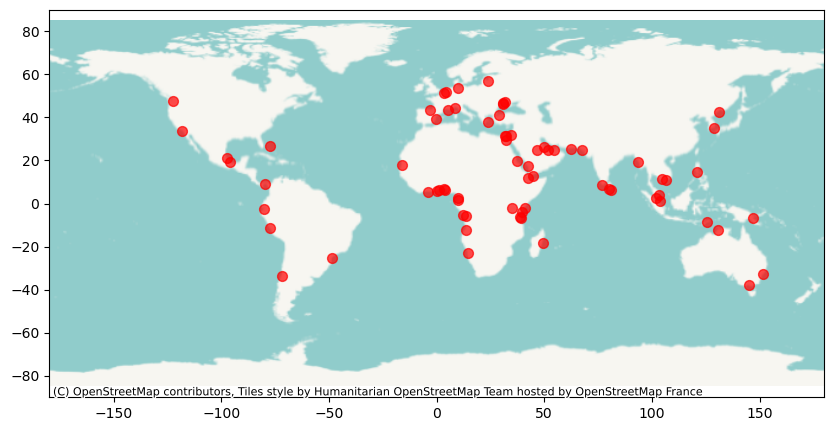

In [74]:
# Plot the geometry with specified options
ax = gdf.plot(marker='o', color='red', markersize=50, alpha=0.7, figsize=(10, 10))
gdf.crs = "EPSG:4326"

# Set axis limits for the entire world
-180, -90, 180, 90 == gdf.total_bounds
ax.set_xlim(-180, 180)
ax.set_ylim(-90, 90)

# Add basemap using OpenStreetMap
cx.add_basemap(ax, crs=gdf.crs)

#Save the plot as a PNG file
plt.savefig('chineseports_space.png', bbox_inches='tight')  # Adjust the filename as needed

# Show the plot
plt.show()

In [75]:
# Read the CSV file with a different encoding
df_UsMilitary2015 = pd.read_csv("C:/Users/Siddharth/JupyterFiles_Python/2nd Term/Data/Data for US_China/US bases 2015.csv", encoding='latin1')

# Check the information about the DataFrame
df_UsMilitary2015.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country/Colony Name              402 non-null    object 
 1   Base Name/Location               398 non-null    object 
 2   Latitude                         401 non-null    float64
 3   Longitude                        401 non-null    float64
 4   # Bases                          57 non-null     object 
 5   # Lily Pads/Small Bases          68 non-null     float64
 6   # U.S. Funded Host Nation Bases  17 non-null     float64
 7   Notes                            108 non-null    object 
dtypes: float64(4), object(4)
memory usage: 40.9+ KB


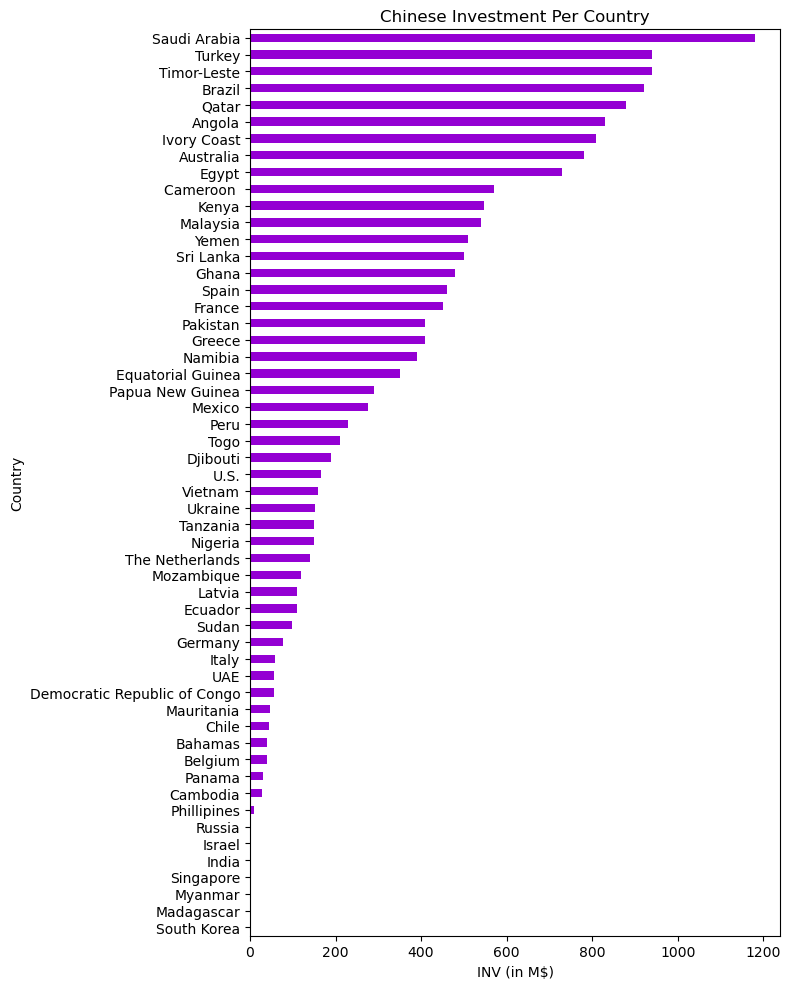

In [76]:
# Group by Counntry and $Amt invested in the Country
invest_percountry = df_chinaports.groupby("Country")['INV (in M$)'].sum()

# Plot a horizontal bar chart
plt.figure(figsize=(8, 10))  # Adjust the size of the plot
invest_percountry.sort_values().plot(kind='barh', color='darkviolet')

plt.xlabel('INV (in M$)')
plt.ylabel('Country')
plt.title('Chinese Investment Per Country')

plt.tight_layout()  # Adjust layout to prevent overlapping labels

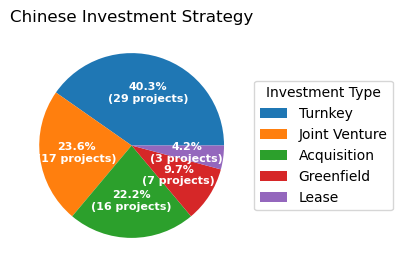

In [77]:
#Types of Chinese Investments into these ports

# Group by investment type and count the number of projects
invst_type_counts = df_chinaports['INV. TYPE'].value_counts()

#plot the pie chart
fig,ax = plt.subplots(figsize=(6,3),subplot_kw=dict(aspect="equal"))

#Extract data and labels for the pie chart
data = invst_type_counts.values
labels = invst_type_counts.index

#Define a function to format the percentage and the absolute count 
def func (pct,allvals):
    absolute= int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d} projects)"

# Plot the pie chart
wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data), textprops=dict(color="w"))

# Add legend
ax.legend(wedges, labels, title="Investment Type", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Set properties for the text labels
plt.setp(autotexts, size=8, weight="bold")

# Set title
ax.set_title("Chinese Investment Strategy")

# Show the plot
plt.show()


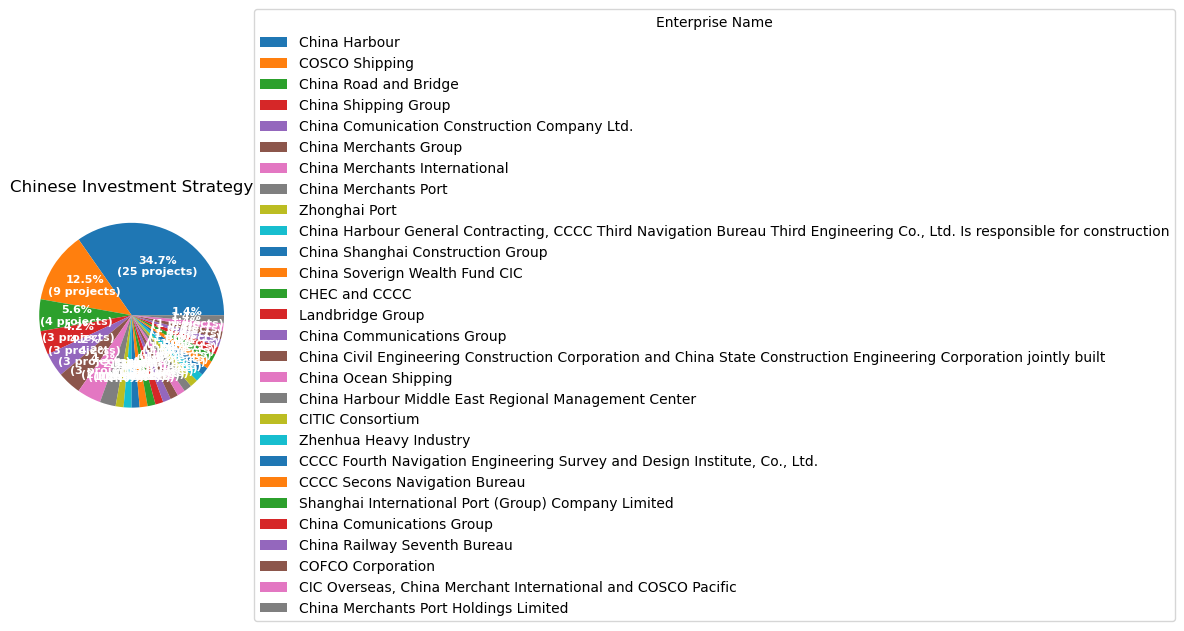

In [78]:
# The Different Companies Involved in the Making of these ports

# Group by Company Name and count the number of projects
coop = df_chinaports['Cooperative enterprise'].value_counts()

#plot the pie chart
fig,ax = plt.subplots(figsize=(6,3),subplot_kw=dict(aspect="equal"))

#Extract data and labels for the pie chart
data = coop.values
labels = coop.index

#Define a function to format the percentage and the absolute count 
def func (pct,allvals):
    absolute= int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d} projects)"

# Plot the pie chart
wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data), textprops=dict(color="w"))

# Add legend
ax.legend(wedges, labels, title="Enterprise Name", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Set properties for the text labels
plt.setp(autotexts, size=8, weight="bold")

# Set title
ax.set_title("Chinese Investment Strategy")

# Show the plot
plt.show()


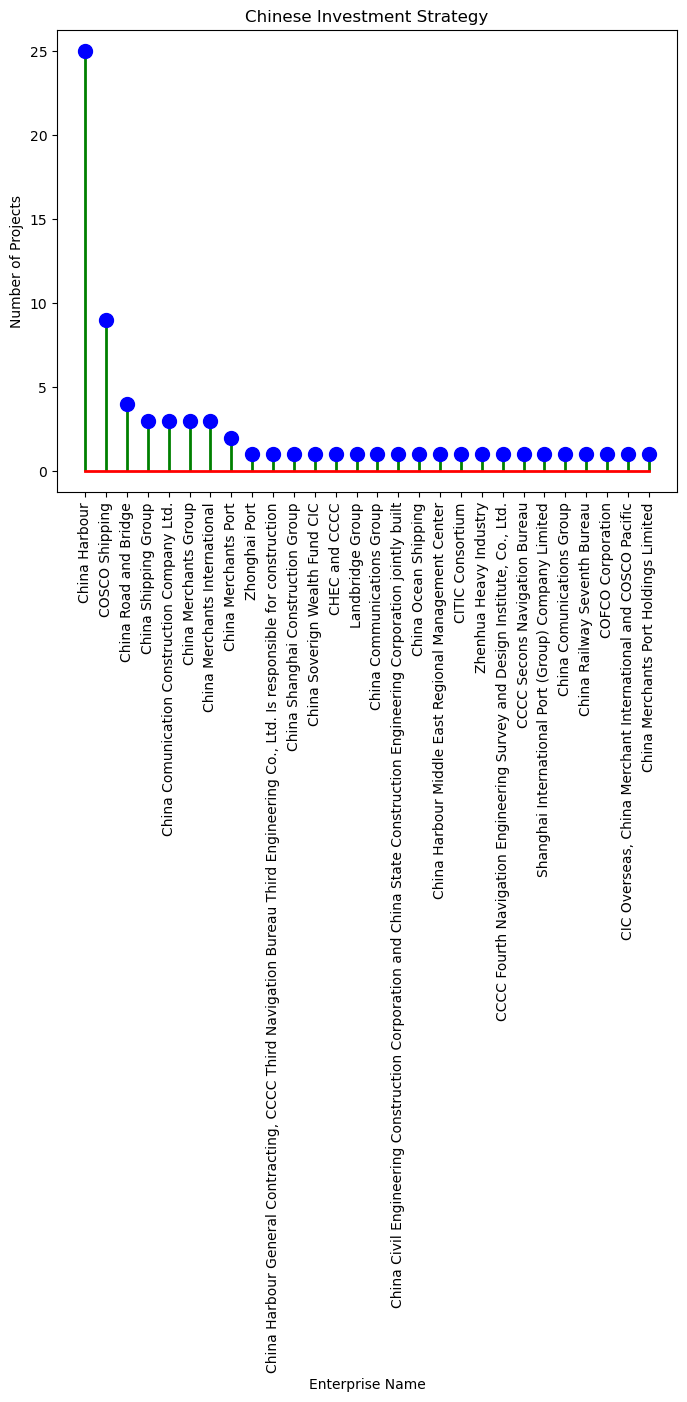

In [80]:
# Group by Company Name and count the number of projects
coop = df_chinaports['Cooperative enterprise'].value_counts()

# Extract data and labels for the stem chart
data = coop.values
labels = coop.index

# Create a stem plot
plt.figure(figsize=(8, 6))
markerline, stemlines, baseline = plt.stem(range(len(data)), data, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.setp(markerline, markersize=10, color='blue')  # Marker properties
plt.setp(stemlines, linewidth=2, color='green')  # Stem line properties
plt.setp(baseline, color='red', linewidth=2)  # Baseline properties

# Add labels
plt.xticks(range(len(data)), labels, rotation='vertical')
plt.xlabel('Enterprise Name')
plt.ylabel('Number of Projects')
plt.title('Chinese Investment Strategy')

#Save the plot as a PNG file
plt.savefig('chineseports_constructors.png', bbox_inches='tight')  # Adjust the filename as needed

# Show the plot
plt.show()


In [81]:
    df_UsMilitary2015.head()

,Country/Colony Name,Base Name/Location,Latitude,Longitude,# Bases,# Lily Pads/Small Bases,# U.S. Funded Host Nation Bases,Notes
0,AFGHANISTAN,Bagram AB,34.946222,69.264639,9,NaN,NaN,Minimum of 9
1,AFGHANISTAN,Kandahar Airfield,31.506807,65.847511,NaN,NaN,NaN,(550 bases at height of US occupation)
2,AFGHANISTAN,Mazar-e-Sharif,36.707497,67.209892,NaN,NaN,NaN,NaN
3,AFGHANISTAN,Gardez,33.625017,69.235840,NaN,NaN,NaN,NaN
4,AFGHANISTAN,Kabul,34.534477,69.150352,NaN,NaN,NaN,NaN


In [82]:
gdf_usa2015 = gpd.GeoDataFrame(df_UsMilitary2015, geometry=gpd.points_from_xy(df_UsMilitary2015.Longitude, df_UsMilitary2015.Latitude), crs=4326)
gdf_usa2015.head()

,Country/Colony Name,Base Name/Location,Latitude,Longitude,# Bases,# Lily Pads/Small Bases,# U.S. Funded Host Nation Bases,Notes,geometry
0,AFGHANISTAN,Bagram AB,34.946222,69.264639,9,NaN,NaN,Minimum of 9,POINT (69.26464 34.94622)
1,AFGHANISTAN,Kandahar Airfield,31.506807,65.847511,NaN,NaN,NaN,(550 bases at height of US occupation),POINT (65.84751 31.50681)
2,AFGHANISTAN,Mazar-e-Sharif,36.707497,67.209892,NaN,NaN,NaN,NaN,POINT (67.20989 36.70750)
3,AFGHANISTAN,Gardez,33.625017,69.235840,NaN,NaN,NaN,NaN,POINT (69.23584 33.62502)
4,AFGHANISTAN,Kabul,34.534477,69.150352,NaN,NaN,NaN,NaN,POINT (69.15035 34.53448)


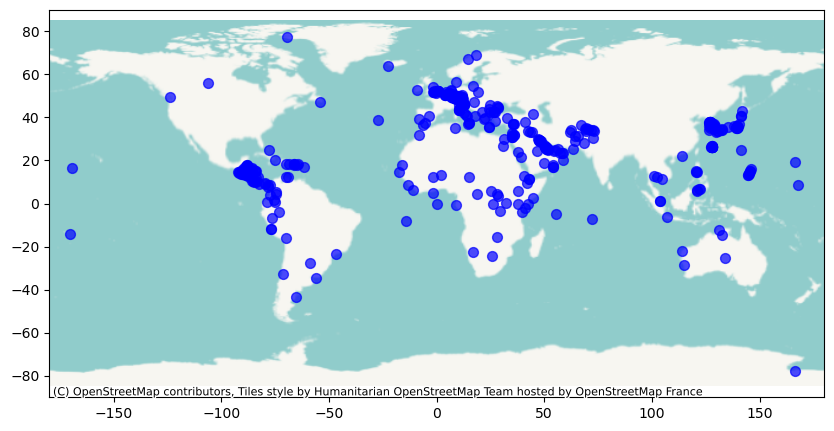

In [83]:
# Plot the geometry with specified options
ax = gdf_usa2015.plot(marker='o', color='blue', markersize=50, alpha=0.7, figsize=(10, 10))
gdf_usa2015.crs = "EPSG:4326"

# Set axis limits for the entire world
-180, -90, 180, 90 == gdf.total_bounds
ax.set_xlim(-180, 180)
ax.set_ylim(-90, 90)

# Add basemap using OpenStreetMap
cx.add_basemap(ax, crs=gdf.crs)

# Show the plot
plt.show()

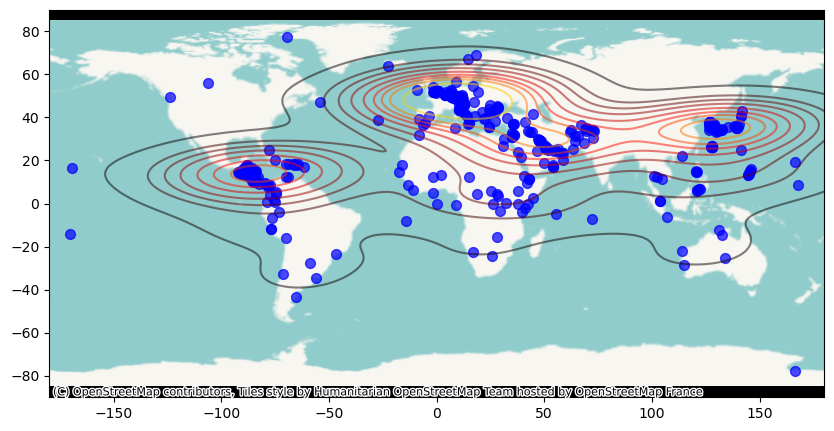

In [84]:
# Plot the geometry with specified options
ax = gdf_usa2015.plot(marker='o', color='blue', markersize=50, alpha=0.7, figsize=(10, 10))
ax.set_facecolor('black')
gdf_usa2015.crs = "EPSG:4326"

# Set axis limits for the entire world
ax.set_xlim(-180, 180)
ax.set_ylim(-90, 90)

# Add basemap using OpenStreetMap
cx.add_basemap(ax, crs=gdf_usa2015.crs)

# Extract coordinates of the US military bases points
x = gdf_usa2015.geometry.x
y = gdf_usa2015.geometry.y

# Create a heatmap overlay using Seaborn's kdeplot function
sns.kdeplot(x=x, y=y, cmap='hot', ax=ax, alpha=0.5)

# Show the plot
plt.show()


In [ ]:
# Plot the world map
ax = gdf_usa2015.plot(color='blue', figsize=(10, 10))

# Extract coordinates of the points
x = gdf_usa2015.geometry.x
y = gdf_usa2015.geometry.y

# Create a heatmap overlay using Seaborn's kdeplot function
sns.kdeplot(x=x, y=y, cmap='hot', ax=ax, fill=True, thresh=0.05, alpha=0.5)

# Add basemap using OpenStreetMap
cx.add_basemap(ax, crs=gdf.crs)

# Show the plot
plt.show()

In [ ]:
# Plot the geometry with specified options
ax = gdf.plot(marker='o', color='red', markersize=50, alpha=0.7, figsize=(10, 10))
gdf.crs = "EPSG:4326"

# Set axis limits for the entire world
ax.set_xlim(-180, 180)
ax.set_ylim(-90, 90)

# Add basemap using OpenStreetMap
cx.add_basemap(ax, crs=gdf.crs)

# Extract coordinates of the US military bases points
x = gdf.geometry.x
y = gdf.geometry.y

# Create a heatmap overlay using Seaborn's kdeplot function
sns.kdeplot(x=x, y=y, cmap='hot', ax=ax, alpha=0.5)

# Show the plot
plt.show()

In [ ]:
# Plot the world map
ax = gdf.plot(color='red', figsize=(10, 10))

# Extract coordinates of the points
x = gdf.geometry.x
y = gdf.geometry.y

# Create a heatmap overlay using Seaborn's kdeplot function
sns.kdeplot(x=x, y=y, cmap='hot', ax=ax, fill=True, thresh=0.05, alpha=0.3)

# Add basemap using OpenStreetMap
cx.add_basemap(ax, crs=gdf.crs)

# Show the plot
plt.show()

In [ ]:
# Plot the world map
ax = gdf_usa2015.plot(color='blue', figsize=(10, 10))

# Extract coordinates of the points
x = gdf_usa2015.geometry.x
y = gdf_usa2015.geometry.y

# Create a hexbin plot
hb = ax.hexbin(x, y, gridsize=50, cmap='hot', alpha=0.3)


# Add basemap using OpenStreetMap
cx.add_basemap(ax, crs=gdf.crs)

# Show the plot
plt.show()

In [ ]:
# Plot the world map
fig, ax = plt.subplots(figsize=(10, 10))
gdf_usa2015.plot(ax=ax, color='blue')
gdf.plot(ax=ax, color='red')

# Extract coordinates of the points
x_usa2015 = gdf_usa2015.geometry.x
y_usa2015 = gdf_usa2015.geometry.y
x = gdf.geometry.x
y = gdf.geometry.y

# Create a hexbin plot
hb = ax.hexbin(x_usa2015, y_usa2015, gridsize=50, cmap='hot', alpha=0.3)


# Add basemap using OpenStreetMap
cx.add_basemap(ax, crs=gdf_usa2015.crs)

# Show the plot
plt.show()
